# 라이브러리 불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns

# 데이터 불러오기

In [2]:
rocket = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/refs/heads/main/RocketLaunchDataCSV.csv')
# rocket = pd.read_csv('data/RocketLaunchDataCSV.csv')
rocket.head(3)

,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,NaN,04-Dec-58,NaN,Cape Canaveral,NaN,NaN,75.0,68.0,71.00,NaN,...,16.0,15.0,NaN,NaN,NaN,30.22,NaN,10:26,Cloudy,NaN
1,NaN,05-Dec-58,NaN,Cape Canaveral,NaN,NaN,78.0,70.0,73.39,NaN,...,14.0,10.0,NaN,NaN,NaN,30.2,NaN,10:26,Cloudy,NaN
2,Pioneer 3,06-Dec-58,1:45,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,NaN,NaN,30.25,NaN,10:25,Cloudy,NaN


# 데이터 탐색 및 전처리

In [3]:
rocket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          60 non-null     object 
 1   Date                          300 non-null    object 
 2   Time (East Coast)             59 non-null     object 
 3   Location                      300 non-null    object 
 4   Crewed or Uncrewed            60 non-null     object 
 5   Launched?                     60 non-null     object 
 6   High Temp                     299 non-null    float64
 7   Low Temp                      299 non-null    float64
 8   Ave Temp                      299 non-null    float64
 9   Temp at Launch Time           59 non-null     float64
 10  Hist High Temp                299 non-null    float64
 11  Hist Low Temp                 299 non-null    float64
 12  Hist Ave Temp                 299 non-null    float64
 13  Perci

## 자료형 변환

In [4]:
# rocket['Sea Level Pressure'].astype('float') 
# 변환할 수 없는 값은 null처리
rocket['Sea Level Pressure'] = pd.to_numeric(rocket['Sea Level Pressure'], errors='coerce')
rocket['Sea Level Pressure'].head(3)

0    30.22
1    30.20
2    30.25
Name: Sea Level Pressure, dtype: float64

In [ ]:
## 시간변경 함수로 하기 
# def time_to_decimal(time_str):
#    try:
#        # 시간과 분을 분리
#        hours, minutes = map(int, time_str.split(':'))
#        # 24시간 기준으로 소수점 변환 (시간 + 분/60)
#        return hours + minutes/60
#    except:
#        return None

# 컬럼에 적용
# rocket['Day Length'] = rocket['Day Length'].apply(time_to_decimal)

# 확인
# print("변환된 값 샘플:", rocket['Day Length'].head())
# print("데이터 타입:", rocket['Day Length'].dtype)

In [6]:
## format 바꾸고 Dataframe 산수로 계산하기 

# 시간을 datetime 형식으로 변환
rocket['Day Length'] = pd.to_datetime(rocket['Day Length'], format='%H:%M')

# 시간 소수점 계산
rocket['Day Length'] = rocket['Day Length'].dt.hour + (rocket['Day Length'].dt.minute / 60)

In [7]:
rocket.head()


,Name,Date,Time (East Coast),Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,...,Max Wind Speed,Visibility,Wind Speed at Launch Time,Hist Ave Max Wind Speed,Hist Ave Visibility,Sea Level Pressure,Hist Ave Sea Level Pressure,Day Length,Condition,Notes
0,NaN,04-Dec-58,NaN,Cape Canaveral,NaN,NaN,75.0,68.0,71.00,NaN,...,16.0,15.0,NaN,NaN,NaN,30.22,NaN,10.433333,Cloudy,NaN
1,NaN,05-Dec-58,NaN,Cape Canaveral,NaN,NaN,78.0,70.0,73.39,NaN,...,14.0,10.0,NaN,NaN,NaN,30.20,NaN,10.433333,Cloudy,NaN
2,Pioneer 3,06-Dec-58,1:45,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,...,15.0,10.0,11.0,NaN,NaN,30.25,NaN,10.416667,Cloudy,NaN
3,NaN,07-Dec-58,NaN,Cape Canaveral,NaN,NaN,76.0,57.0,66.04,NaN,...,10.0,10.0,NaN,NaN,NaN,30.28,NaN,10.416667,Partly Cloudy,NaN
4,NaN,08-Dec-58,NaN,Cape Canaveral,NaN,NaN,79.0,60.0,70.52,NaN,...,12.0,10.0,NaN,NaN,NaN,30.23,NaN,12.400000,Partly Cloudy,NaN


## object 타입인 변수의 데이터 분포 확인

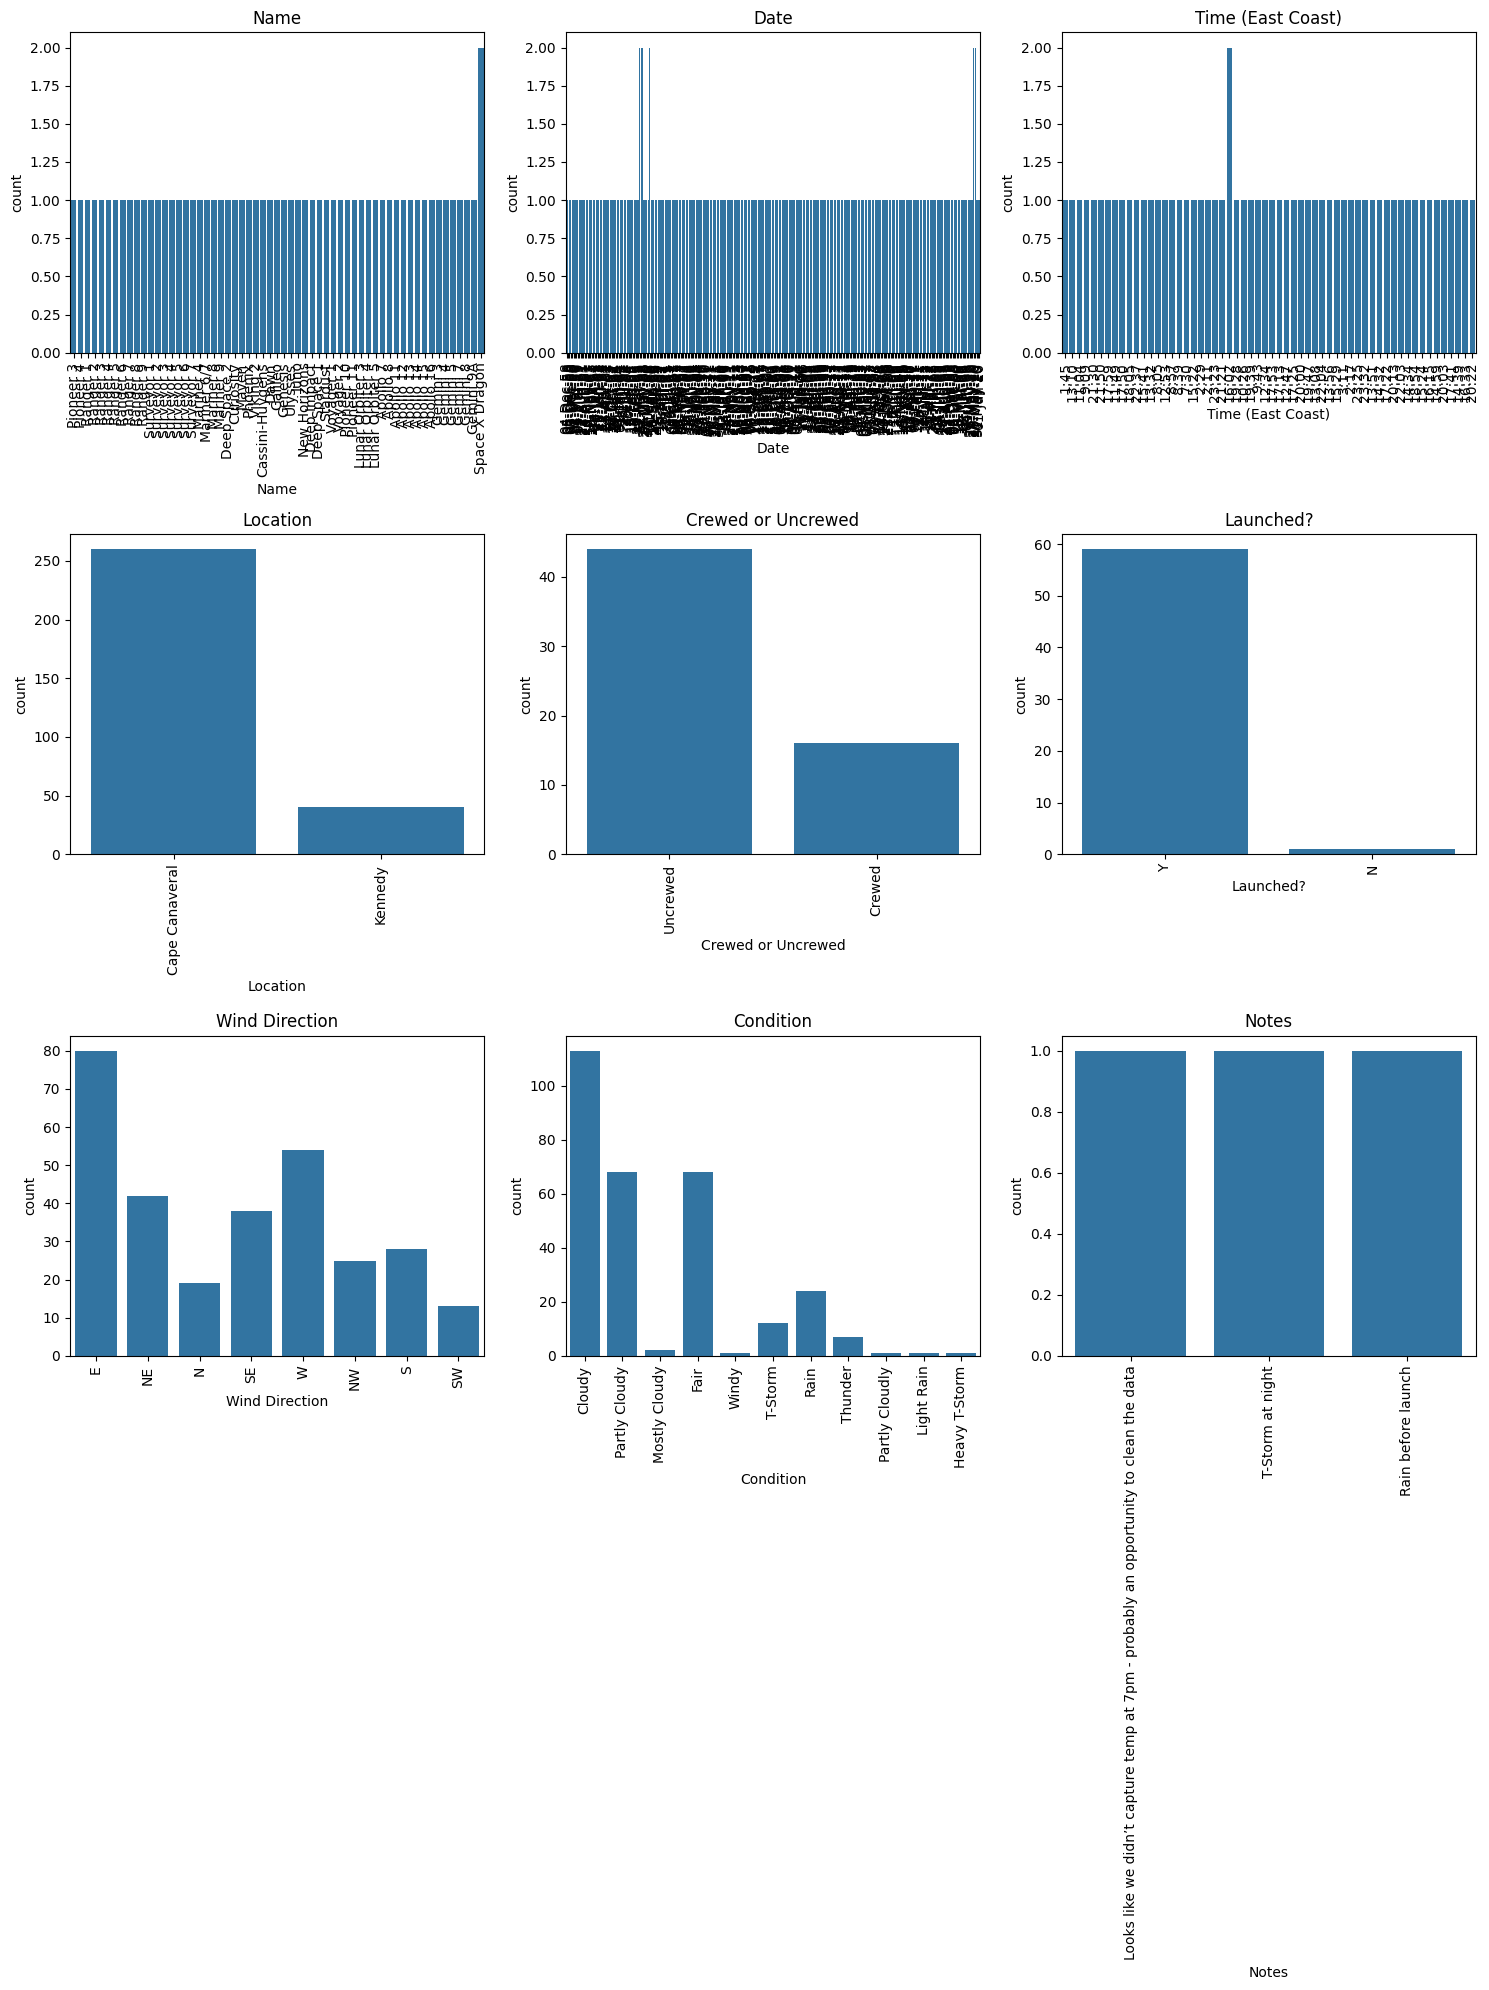

In [8]:
# 데이터타입이 object인 컬럼 추출출
object_cols = rocket.select_dtypes(include=['object']).columns
object_cols

# 데이터 분포 확인
plt.figure(figsize=(15,20))
i = 1
for col in object_cols:
    plt.subplot(3,3,i)
    i+=1
    sns.countplot(data=rocket, x=col)
    plt.xticks(rotation=90)
    plt.title(col)
plt.tight_layout()

Name, Date, Time은 큰 의미없는 변수로 파악됨


## int, float 타입인 데이터의 분포 확인

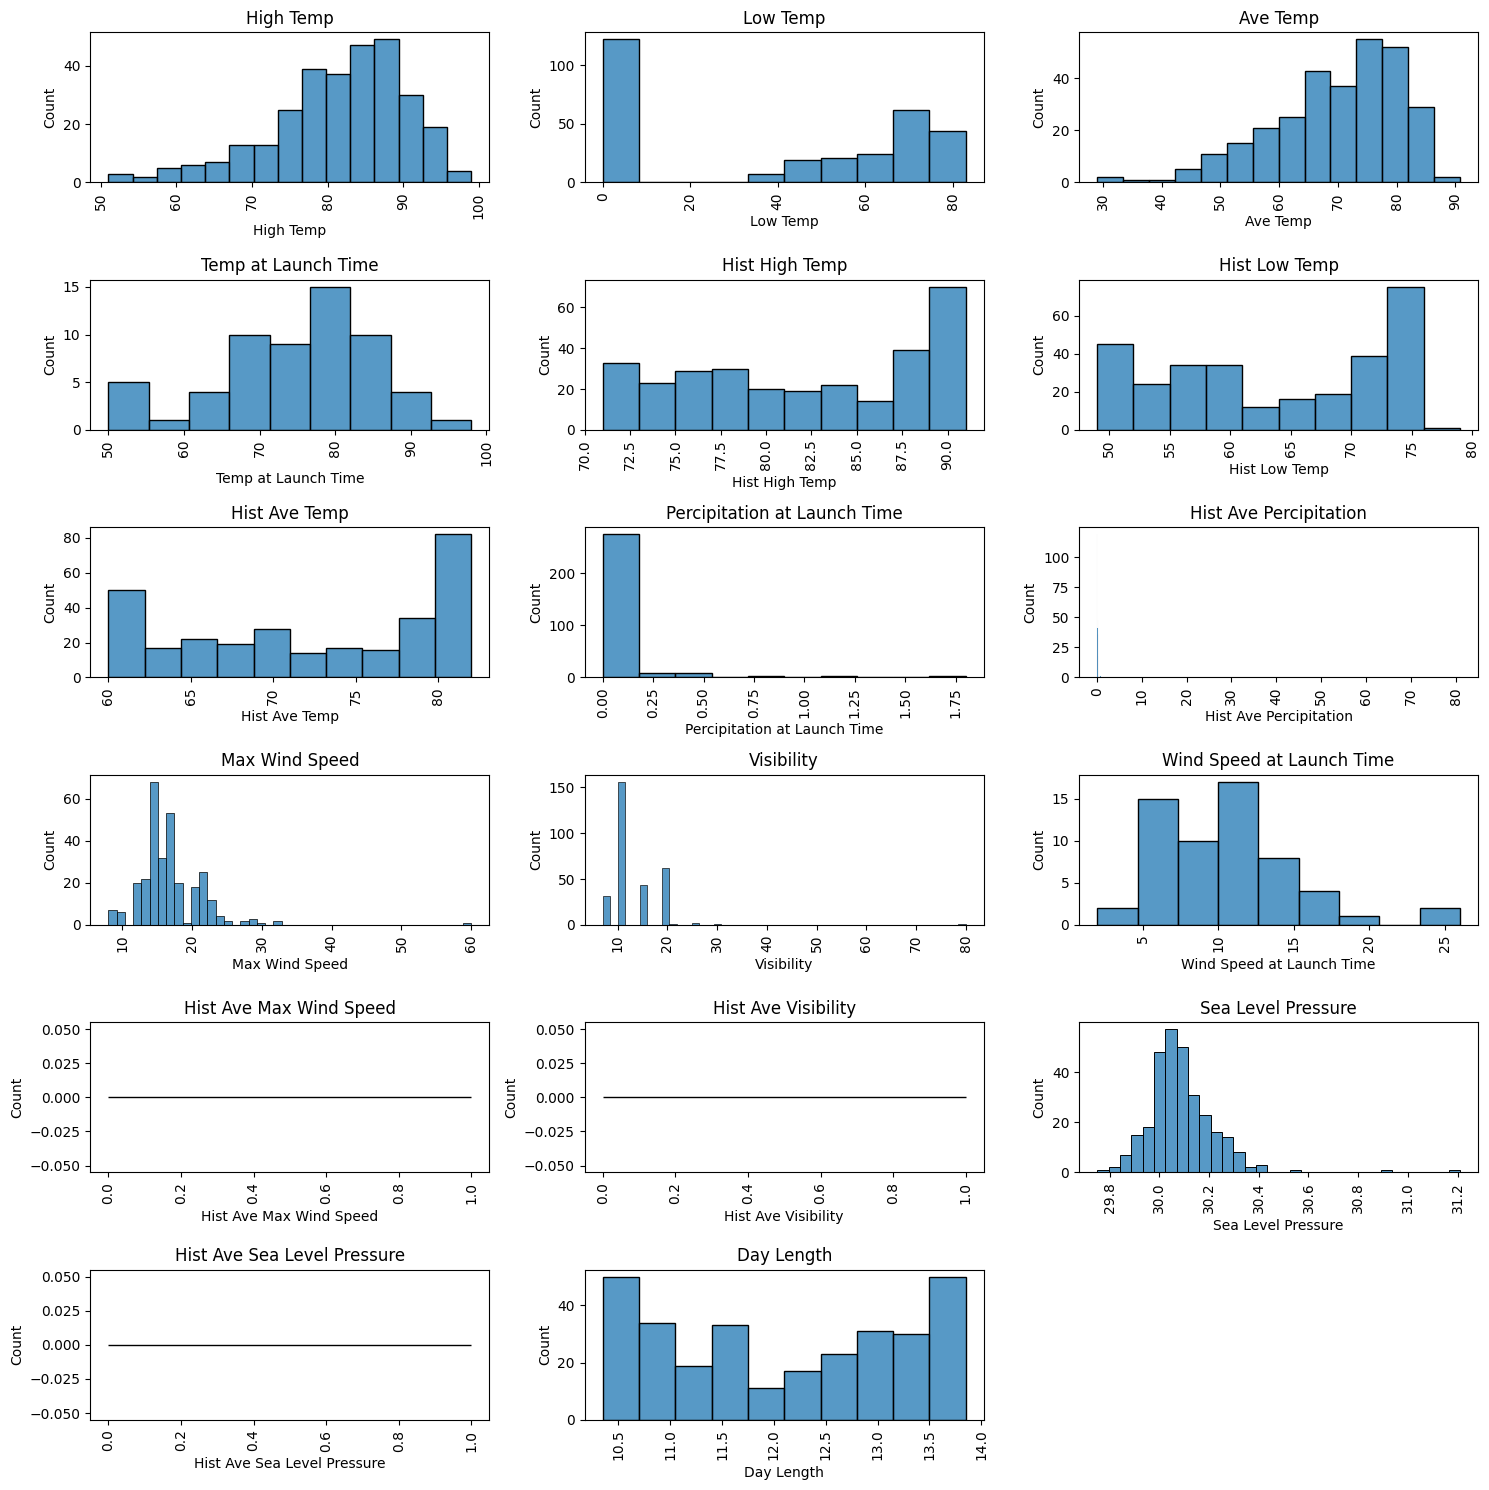

In [9]:
# 데이터타입이 float인 컬럼 추출
numeric_cols = rocket.select_dtypes(include=['int','float']).columns
numeric_cols

# 데이터 분포 확인
plt.figure(figsize=(15,15))
i = 1
for col in numeric_cols:
    plt.subplot(6,3,i)
    i+=1
    sns.histplot(data=rocket, x=col)
    plt.xticks(rotation=90)
    plt.title(col)
plt.tight_layout()

## 데이터 전처리

### 불필요한 컬럼 제거

In [10]:
# 사용하지 않을 컬럼

del_cols = ['Name', 'Date', 'Time (East Coast)','Notes',\
            'Percipitation at Launch Time', 'Hist Ave Percipitation',\
            'Hist Ave Max Wind Speed', 'Hist Ave Visibility','Hist Ave Sea Level Pressure']
df = rocket.drop(columns=del_cols)
df.head()

,Location,Crewed or Uncrewed,Launched?,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Sea Level Pressure,Day Length,Condition
0,Cape Canaveral,NaN,NaN,75.0,68.0,71.00,NaN,75.0,55.0,65.0,E,16.0,15.0,NaN,30.22,10.433333,Cloudy
1,Cape Canaveral,NaN,NaN,78.0,70.0,73.39,NaN,75.0,55.0,65.0,E,14.0,10.0,NaN,30.20,10.433333,Cloudy
2,Cape Canaveral,Uncrewed,Y,73.0,0.0,60.21,62.0,75.0,55.0,65.0,NE,15.0,10.0,11.0,30.25,10.416667,Cloudy
3,Cape Canaveral,NaN,NaN,76.0,57.0,66.04,NaN,75.0,55.0,65.0,N,10.0,10.0,NaN,30.28,10.416667,Partly Cloudy
4,Cape Canaveral,NaN,NaN,79.0,60.0,70.52,NaN,75.0,55.0,65.0,E,12.0,10.0,NaN,30.23,12.400000,Partly Cloudy


### 결측치 확인 및 처리

In [11]:
df.isnull().sum()

Location                       0
Crewed or Uncrewed           240
Launched?                    240
High Temp                      1
Low Temp                       1
Ave Temp                       1
Temp at Launch Time          241
Hist High Temp                 1
Hist Low Temp                  1
Hist Ave Temp                  1
Wind Direction                 1
Max Wind Speed                 1
Visibility                     1
Wind Speed at Launch Time    241
Sea Level Pressure             2
Day Length                     2
Condition                      2
dtype: int64

In [12]:
# Crewed or Uncrewed --> 'Uncrewed'로 채우기

df['Crewed or Uncrewed'] = df['Crewed or Uncrewed'].fillna('Uncrewed')

# Launched? --> 'N'으로 채우기

df['Launched?'] = df['Launched?'].fillna('N')


In [13]:
df.isnull().sum()

Location                       0
Crewed or Uncrewed             0
Launched?                      0
High Temp                      1
Low Temp                       1
Ave Temp                       1
Temp at Launch Time          241
Hist High Temp                 1
Hist Low Temp                  1
Hist Ave Temp                  1
Wind Direction                 1
Max Wind Speed                 1
Visibility                     1
Wind Speed at Launch Time    241
Sea Level Pressure             2
Day Length                     2
Condition                      2
dtype: int64

In [14]:
# object타입 변수의 결측값 채우기 (최빈값으로 채우기)
obj_cols = df.select_dtypes(include=['object']).columns

df[obj_cols]= df[obj_cols].fillna(df[obj_cols].mode().iloc[0])

In [15]:
# 수치형 타입 변수의 결측값 채우기 (평균값으로 채우기)
num_cols = df.select_dtypes(include=['int','float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

In [16]:
df.isnull().sum()

Location                     0
Crewed or Uncrewed           0
Launched?                    0
High Temp                    0
Low Temp                     0
Ave Temp                     0
Temp at Launch Time          0
Hist High Temp               0
Hist Low Temp                0
Hist Ave Temp                0
Wind Direction               0
Max Wind Speed               0
Visibility                   0
Wind Speed at Launch Time    0
Sea Level Pressure           0
Day Length                   0
Condition                    0
dtype: int64

## 독립변수와 종속변수의 관계

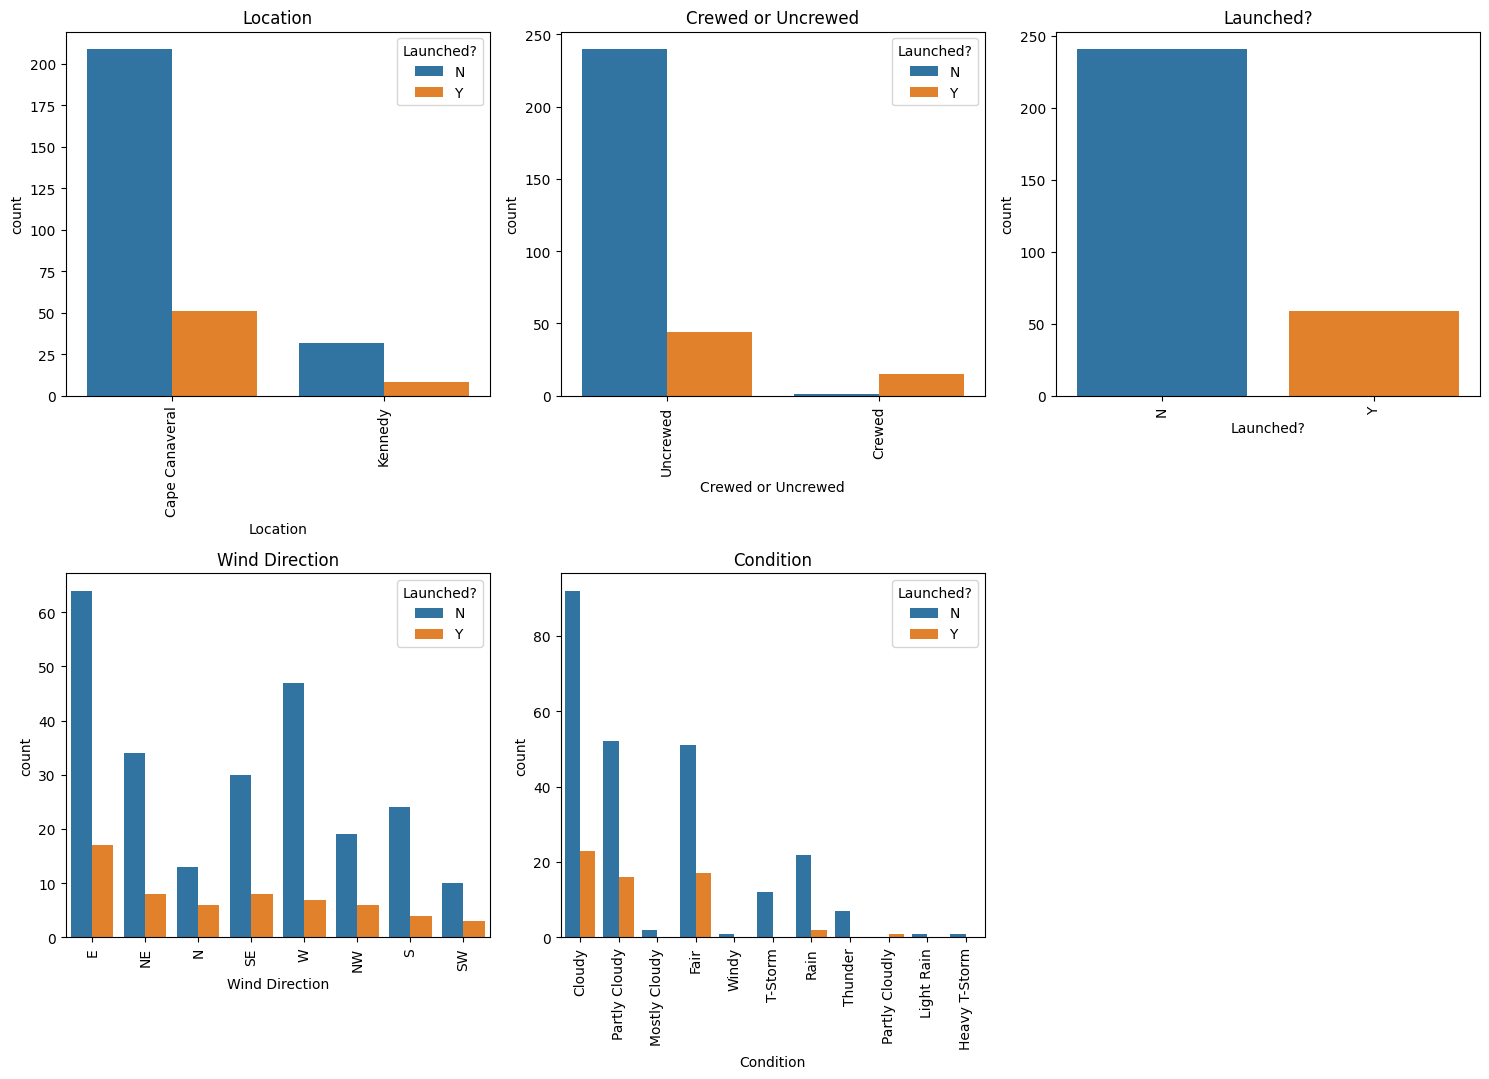

In [17]:
plt.figure(figsize=(15,15))
i = 1
for col in obj_cols :  ## enumerate도 가능
    plt.subplot(3,3,i)
    i += 1
    sns.countplot(data=df, x=col, hue='Launched?')
    plt.xticks(rotation=90)
    plt.title(col)
plt.tight_layout()

In [18]:
Cape_total = len(df[df['Location']=='Cape Canaveral'])
Kennedy_total = len(df[df['Location']=='Kennedy'])

Cape_laun = len(df[(df['Location']=='Cape Canaveral') & (df['Launched?']=='Y')])
Kennedy_laun = len(df[(df['Location']=='Kennedy') & (df['Launched?']=='Y')])

Cape_ratio = Cape_laun / Cape_total
Kennedy_ratio = Kennedy_laun / Kennedy_total

print(Cape_ratio)
print(Kennedy_ratio)

0.19615384615384615
0.2


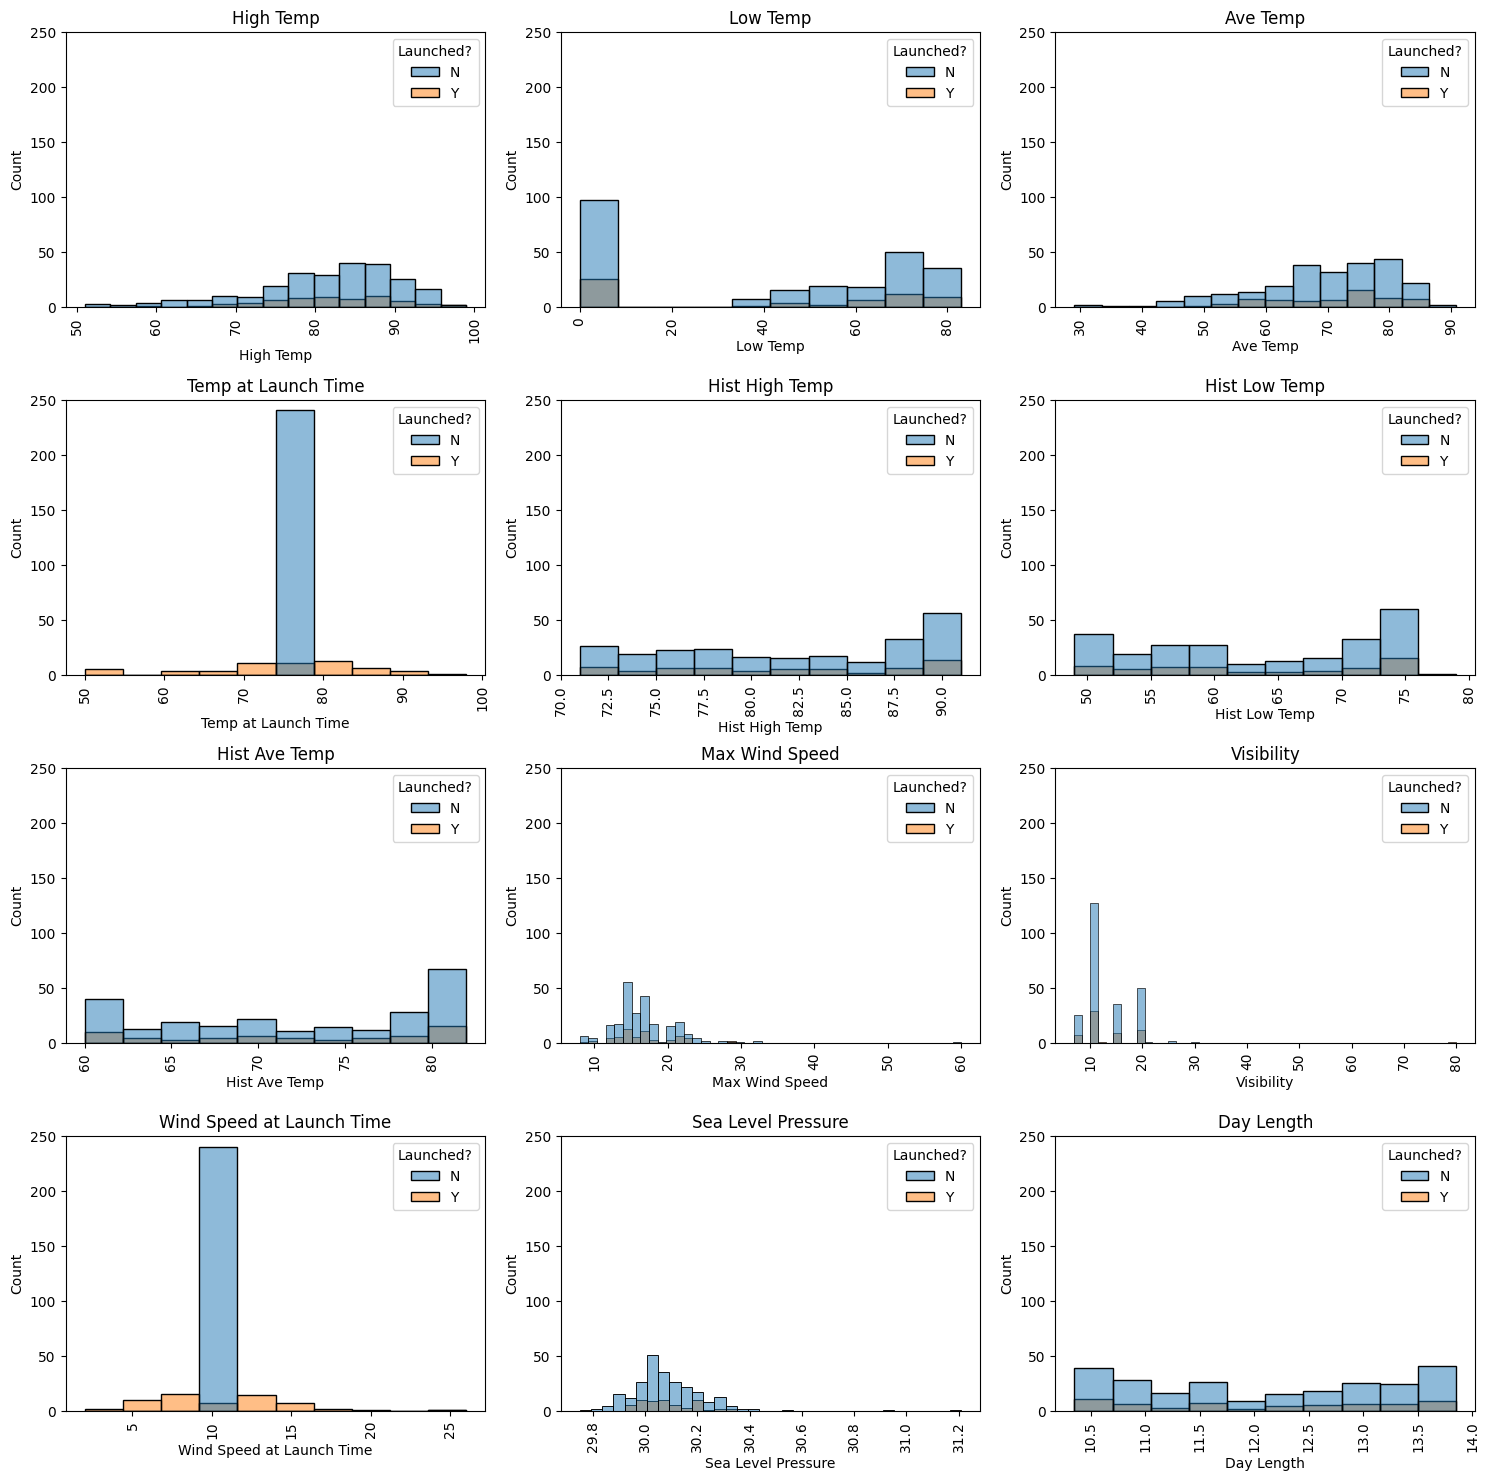

In [19]:
plt.figure(figsize=(15,15))
i = 1
for col in num_cols:
    plt.subplot(4,3,i)
    i += 1
    sns.histplot(data=df, x=col, hue='Launched?')
    plt.xticks(rotation=90)
    plt.title(col)
    plt.ylim(0,250)
plt.tight_layout()

# 변수 선택

In [20]:
X = df.drop(columns=['Launched?'])
y = df['Launched?']


# 인코딩

## 종속변수 인코딩
* Launched?
    * Y-->1
    * N-->0

In [21]:
y = y.map({'Y' : 1, 'N' : 0})
y.value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      0
2      1
3      0
4      0
      ..
295    0
296    0
297    1
298    0
299    0
Name: Launched?, Length: 300, dtype: int64>

## 독립변수 레이블인코딩

In [22]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

Xobj_cols = X.select_dtypes(include=['object'])
for col in Xobj_cols :
    X[col] = encoder.fit_transform(X[col])

X.head()

,Location,Crewed or Uncrewed,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Sea Level Pressure,Day Length,Condition
0,0,1,75.0,68.0,71.00,75.101695,75.0,55.0,65.0,0,16.0,15.0,10.59322,30.22,10.433333,0
1,0,1,78.0,70.0,73.39,75.101695,75.0,55.0,65.0,0,14.0,10.0,10.59322,30.20,10.433333,0
2,0,1,73.0,0.0,60.21,62.000000,75.0,55.0,65.0,2,15.0,10.0,11.00000,30.25,10.416667,0
3,0,1,76.0,57.0,66.04,75.101695,75.0,55.0,65.0,1,10.0,10.0,10.59322,30.28,10.416667,6
4,0,1,79.0,60.0,70.52,75.101695,75.0,55.0,65.0,0,12.0,10.0,10.59322,30.23,12.400000,6


원핫 인코딩 : pd.get_dummies - 한번 하면 자동으로 해줌
레이블 인코딩 : LabelEncoder  - 각각 for 문으로 적용 

In [23]:
X['Crewed or Uncrewed'].value_counts()

Crewed or Uncrewed
1    284
0     16
Name: count, dtype: int64

# 모델링

## 훈련세트/테스트세트 분할


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(225, 16) (75, 16) (225,) (75,)


## 모델 생성 및 훈련

In [25]:
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier()
dtmodel.fit(X_train, y_train)

print(f'테스트 정확도 : {dtmodel.score(X_test, y_test)}')
print(f'학습 정확도 : {dtmodel.score(X_train, y_train)}')

테스트 정확도 : 0.9866666666666667
학습 정확도 : 1.0


## 분류 모델의 평가지표

In [26]:
pred_test = dtmodel.predict(X_test)
pred_train = dtmodel.predict(X_train)

from sklearn.metrics import classification_report, accuracy_score
print(f'''테스트 점수 :
      {classification_report(y_test, pred_test)}
학습 점수 :
      {classification_report(y_train, pred_train)}''')

print(accuracy_score(y_test, pred_test))

테스트 점수 :
                    precision    recall  f1-score   support

           0       0.98      1.00      0.99        60
           1       1.00      0.93      0.97        15

    accuracy                           0.99        75
   macro avg       0.99      0.97      0.98        75
weighted avg       0.99      0.99      0.99        75

학습 점수 :
                    precision    recall  f1-score   support

           0       1.00      1.00      1.00       181
           1       1.00      1.00      1.00        44

    accuracy                           1.00       225
   macro avg       1.00      1.00      1.00       225
weighted avg       1.00      1.00      1.00       225

0.9866666666666667


#### ROC curve와 AUC 

AUC : 0.9667


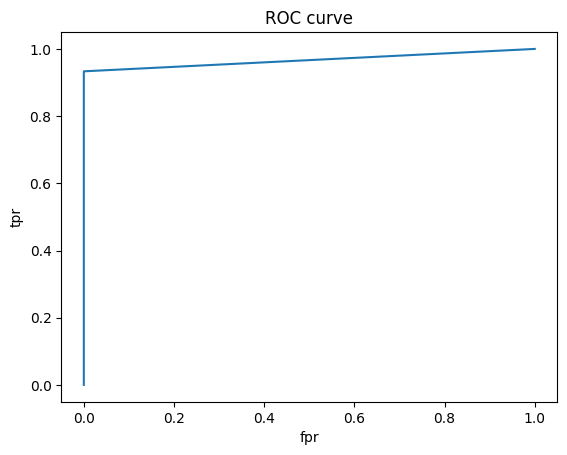

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
pred_proba = dtmodel.predict_proba(X_test)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')

# AUC
auc = roc_auc_score(y_test, pred_proba[:, 1])
print(f'AUC : {auc:.4f}')

# 모델의 학습 결과

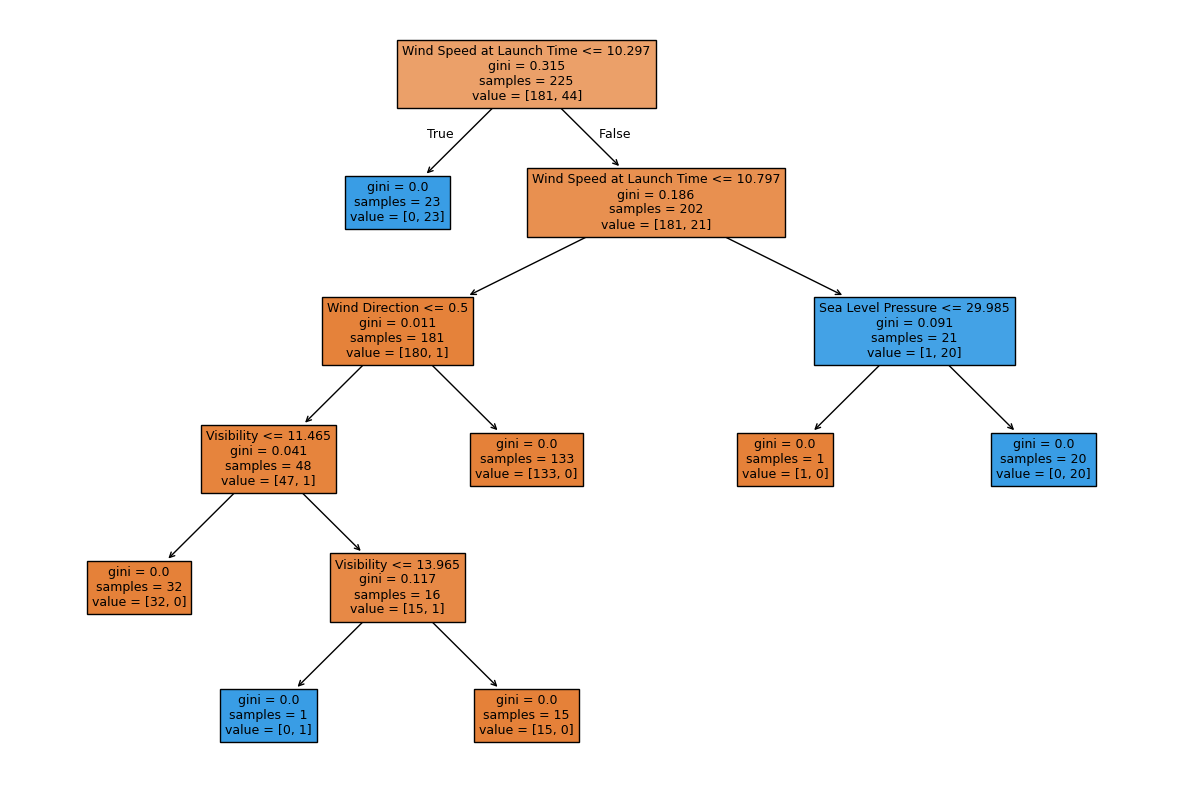

In [28]:
# 시각화
from sklearn.tree import plot_tree
plt.figure(figsize = (15,10))
plot_tree(dtmodel, feature_names=X.columns, filled=True)
plt.show()

In [29]:
# 트리의 깊이

dtmodel.get_depth()


5

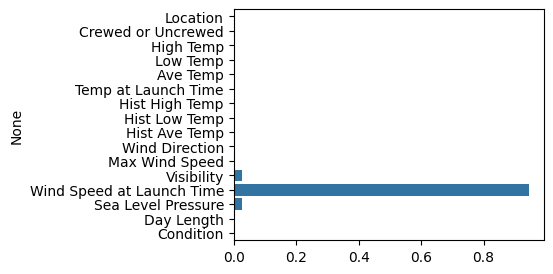

In [30]:
# 특성의 중요도
plt.figure(figsize=(4,3))
sns.barplot(y=X.columns, x=dtmodel.feature_importances_)
plt.show()

# 변수 재선택

In [31]:
X.head()

,Location,Crewed or Uncrewed,High Temp,Low Temp,Ave Temp,Temp at Launch Time,Hist High Temp,Hist Low Temp,Hist Ave Temp,Wind Direction,Max Wind Speed,Visibility,Wind Speed at Launch Time,Sea Level Pressure,Day Length,Condition
0,0,1,75.0,68.0,71.00,75.101695,75.0,55.0,65.0,0,16.0,15.0,10.59322,30.22,10.433333,0
1,0,1,78.0,70.0,73.39,75.101695,75.0,55.0,65.0,0,14.0,10.0,10.59322,30.20,10.433333,0
2,0,1,73.0,0.0,60.21,62.000000,75.0,55.0,65.0,2,15.0,10.0,11.00000,30.25,10.416667,0
3,0,1,76.0,57.0,66.04,75.101695,75.0,55.0,65.0,1,10.0,10.0,10.59322,30.28,10.416667,6
4,0,1,79.0,60.0,70.52,75.101695,75.0,55.0,65.0,0,12.0,10.0,10.59322,30.23,12.400000,6


In [32]:
X2 = X.drop(['Wind Speed at Launch Time', 'Temp at Launch Time', 'Crewed or Uncrewed'], axis=1)

In [33]:
y2 = df['Launched?']

In [34]:
y2 = y2.map({'Y' : 1, 'N' : 0})
y2.value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      0
2      1
3      0
4      0
      ..
295    0
296    0
297    1
298    0
299    0
Name: Launched?, Length: 300, dtype: int64>

In [35]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, stratify=y2)

dtmodel2 = DecisionTreeClassifier()
dtmodel2.fit(X2_train, y2_train)

pred2_train = dtmodel2.predict(X2_train)
pred2_test = dtmodel2.predict(X2_test)

from sklearn.metrics import classification_report, accuracy_score
print(f'''테스트 점수 :
      {classification_report(y2_test, pred2_test)}
학습 점수 :
      {classification_report(y2_train, pred2_train)}''')

print(accuracy_score(y2_test, pred2_test))

테스트 점수 :
                    precision    recall  f1-score   support

           0       0.79      0.80      0.79        60
           1       0.14      0.13      0.14        15

    accuracy                           0.67        75
   macro avg       0.46      0.47      0.47        75
weighted avg       0.66      0.67      0.66        75

학습 점수 :
                    precision    recall  f1-score   support

           0       1.00      1.00      1.00       181
           1       1.00      1.00      1.00        44

    accuracy                           1.00       225
   macro avg       1.00      1.00      1.00       225
weighted avg       1.00      1.00      1.00       225

0.6666666666666666


AUC : 0.4667


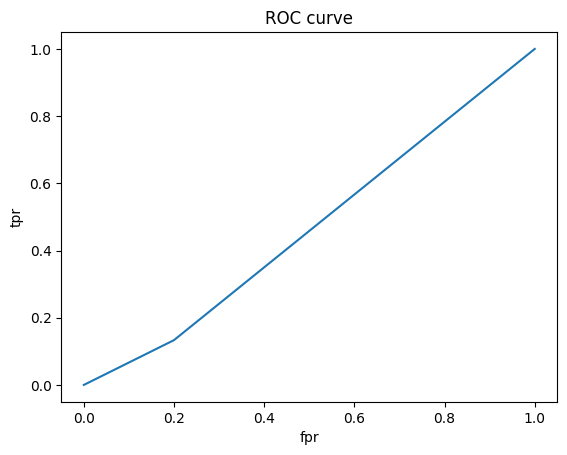

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score
pred_proba2 = dtmodel2.predict_proba(X2_test)

# ROC curve
fpr2, tpr2, thresholds2 = roc_curve(y2_test, pred_proba2[:, 1])
plt.plot(fpr2, tpr2)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')

# AUC
auc2 = roc_auc_score(y2_test, pred_proba2[:, 1])
print(f'AUC : {auc2:.4f}')

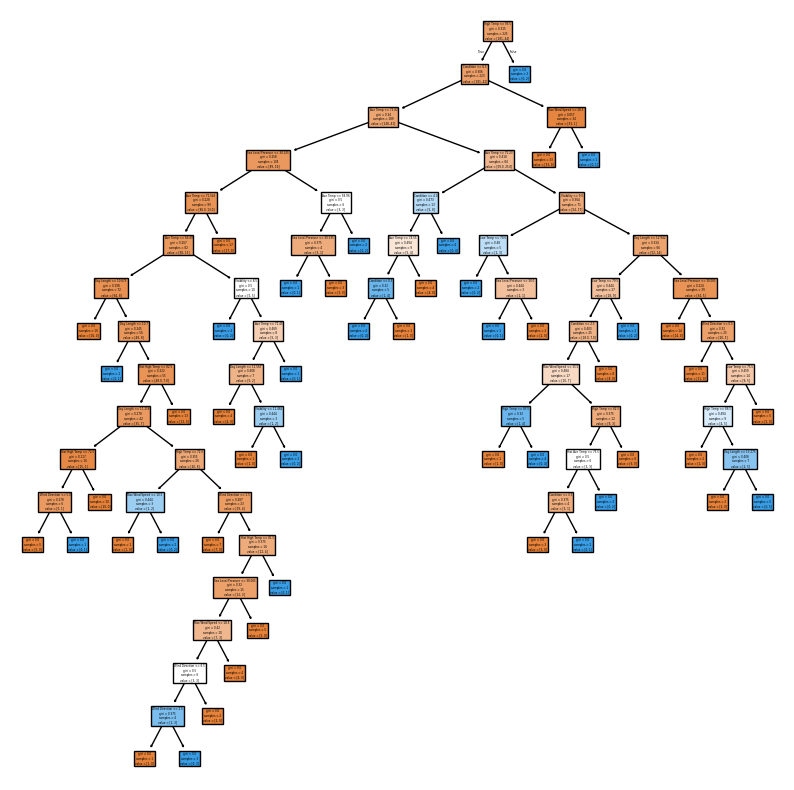

In [37]:
plt.figure(figsize=(10,10))
plot_tree(dtmodel2, feature_names=X2.columns, filled=True)
plt.show()

<Axes: ylabel='None'>

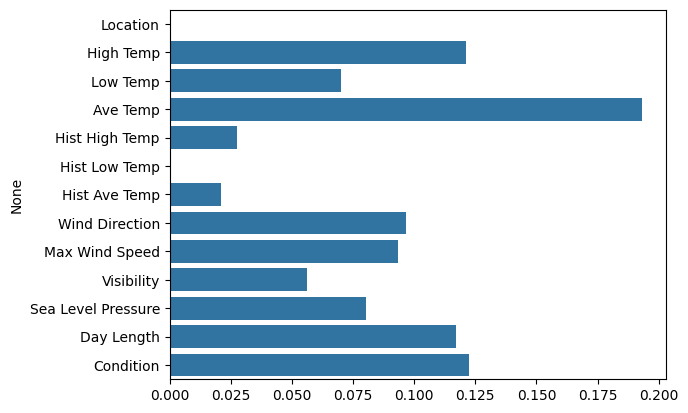

In [38]:
sns.barplot(y=X2.columns, x=dtmodel2.feature_importances_)

# 불균형 데이터 처리

In [39]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [41]:
# 오버샘플링
from imblearn.over_sampling import RandomOverSampler

# 오버샘플링 적용
ros = RandomOverSampler()
X2_train_resampled, y2_train_resampled = ros.fit_resample(X2_train, y2_train)

print(X2_train_resampled.shape, y2_train_resampled.shape)
print(y2_train_resampled.value_counts())

(362, 13) (362,)
Launched?
0    181
1    181
Name: count, dtype: int64


#### 불균형 데이터 처리후 재학습

In [43]:
dtmodel3 = DecisionTreeClassifier(max_depth=4)
dtmodel3.fit(X2_train_resampled, y2_train_resampled)

pred3_test = dtmodel3.predict(X2_test)
pred3_train = dtmodel3.predict(X2_train)

from sklearn.metrics import classification_report, accuracy_score
print(f'''테스트 점수 :
      {classification_report(y2_test, pred3_test)}
학습 점수 :
      {classification_report(y2_train, pred3_train)}''')

print(accuracy_score(y2_test, pred3_test))

테스트 점수 :
                    precision    recall  f1-score   support

           0       0.94      0.27      0.42        60
           1       0.24      0.93      0.38        15

    accuracy                           0.40        75
   macro avg       0.59      0.60      0.40        75
weighted avg       0.80      0.40      0.41        75

학습 점수 :
                    precision    recall  f1-score   support

           0       1.00      0.25      0.41       181
           1       0.25      1.00      0.39        44

    accuracy                           0.40       225
   macro avg       0.62      0.63      0.40       225
weighted avg       0.85      0.40      0.40       225

0.4


In [50]:
## 하이퍼파라미터 적용

from sklearn.model_selection import GridSearchCV, StratifiedKFold
skf = StratifiedKFold()
dtmodel4 = DecisionTreeClassifier()

parameters = {'max_depth' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]}

gscv = GridSearchCV(dtmodel4, param_grid=parameters, cv=skf, refit=True)

gscv.fit(X2_train_resampled, y2_train_resampled)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]})

In [51]:
display(pd.DataFrame(gscv.cv_results_))
print(f'최적의 파라미터 : {gscv.best_params_}')
print(f'최고 정확도 : {gscv.best_score_:.4f}')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001622,0.000291,0.000924,0.000036,1,{'max_depth': 1},0.520548,0.520548,0.527778,0.541667,0.541667,0.530441,0.009538,11
1,0.001623,0.000165,0.000960,0.000083,2,{'max_depth': 2},0.520548,0.520548,0.527778,0.555556,0.583333,0.541553,0.024551,10
2,0.001558,0.000017,0.000908,0.000080,3,{'max_depth': 3},0.520548,0.547945,0.583333,0.597222,0.638889,0.577588,0.040764,9
3,0.001614,0.000026,0.000880,0.000042,4,{'max_depth': 4},0.520548,0.602740,0.722222,0.597222,0.611111,0.610769,0.064513,8
4,0.002625,0.000875,0.001398,0.000403,5,{'max_depth': 5},0.561644,0.616438,0.791667,0.680556,0.652778,0.660616,0.076656,7
5,0.002467,0.000351,0.001203,0.000229,6,{'max_depth': 6},0.547945,0.657534,0.791667,0.680556,0.680556,0.671651,0.077543,6
6,0.002162,0.000225,0.001046,0.000115,7,{'max_depth': 7},0.547945,0.753425,0.819444,0.750000,0.722222,0.718607,0.091109,5
7,0.002306,0.000161,0.001036,0.000037,8,{'max_depth': 8},0.630137,0.643836,0.847222,0.750000,0.750000,0.724239,0.079715,4
8,0.002061,0.000091,0.000902,0.000040,9,{'max_depth': 9},0.602740,0.726027,0.847222,0.736111,0.777778,0.737976,0.079942,3
9,0.002131,0.000214,0.000909,0.000083,10,{'max_depth': 10},0.616438,0.753425,0.902778,0.791667,0.777778,0.768417,0.091655,2


최적의 파라미터 : {'max_depth': 11}
최고 정확도 : 0.8043


In [54]:
best_model = gscv.best_estimator_

pred_gscv = best_model.predict(X2_test)
pred_gscv_train = best_model.predict(X2_train)

print(f'''테스트 점수 :
      {classification_report(y2_test, pred_gscv)}
학습 점수 :
      {classification_report(y2_train, pred_gscv_train)}''')

print(accuracy_score(y2_test, pred_gscv))

테스트 점수 :
                    precision    recall  f1-score   support

           0       0.79      0.75      0.77        60
           1       0.17      0.20      0.18        15

    accuracy                           0.64        75
   macro avg       0.48      0.47      0.48        75
weighted avg       0.66      0.64      0.65        75

학습 점수 :
                    precision    recall  f1-score   support

           0       0.99      0.95      0.97       181
           1       0.83      0.98      0.90        44

    accuracy                           0.96       225
   macro avg       0.91      0.96      0.93       225
weighted avg       0.96      0.96      0.96       225

0.64


# 다른 모델 적용

### 랜덤 포레스트

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfcmodel = RandomForestClassifier()
rfcmodel.fit(X2_train_resampled, y2_train_resampled)

predrfc_test = rfcmodel.predict(X2_test)
predrfc_train = rfcmodel.predict(X2_train)

print(f'''테스트 점수 :
      {classification_report(y2_test, predrfc_test)}
학습 점수 :
      {classification_report(y2_train, predrfc_train)}''')

print(accuracy_score(y2_test, predrfc_test))

테스트 점수 :
                    precision    recall  f1-score   support

           0       0.77      0.83      0.80        60
           1       0.00      0.00      0.00        15

    accuracy                           0.67        75
   macro avg       0.38      0.42      0.40        75
weighted avg       0.62      0.67      0.64        75

학습 점수 :
                    precision    recall  f1-score   support

           0       1.00      1.00      1.00       181
           1       1.00      1.00      1.00        44

    accuracy                           1.00       225
   macro avg       1.00      1.00      1.00       225
weighted avg       1.00      1.00      1.00       225

0.6666666666666666
